Q1

In [63]:
1

1

Q2

In [64]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('T124OPPE2_ModelBuilding_V1.csv')
df.shape

(4000, 17)

In [65]:
from sklearn.linear_model import Perceptron

model = Perceptron(
    random_state=1729,
    eta0=1, # learning rate
    fit_intercept=True,
    shuffle=False,
    warm_start=True,
    max_iter=5,
    validation_fraction=0.1,
    penalty=None
)

In [66]:
X = df.drop(['HeartAttack'], axis=1)
y = df['HeartAttack']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [67]:
model.fit(X_train, y_train)

c:\Users\91820\Desktop\MLP-IIT\.env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=1, max_iter=5, random_state=1729, shuffle=False,
           warm_start=True)

In [68]:
model.intercept_

array([-3.])

Q3

In [78]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_train)
precision_score(y_train, y_pred, pos_label=1)

0.6666666666666666

Q4

In [88]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
model = SGDClassifier(
    penalty='l2',
    eta0=0.001,
    alpha=0,
    learning_rate='constant',
    random_state=1729,
    warm_start=True,
    loss='log_loss',
    max_iter=1,
)
loss_values=[]
for i in range(5):
    model.fit(X_train, y_train)
    y_train_proba = model.predict_proba(X_train)
    loss = log_loss(y_train, y_train_proba)
    loss_values.append(loss)
loss_values

c:\Users\91820\Desktop\MLP-IIT\.env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\91820\Desktop\MLP-IIT\.env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\91820\D

[0.25299046090129185,
 0.20828682141739835,
 0.19406901833322654,
 0.18699850891012407,
 0.18255077295024025]

Q5

In [89]:
from sklearn.model_selection import GridSearchCV 
model = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    random_state=1729
)
param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005],
	'eta0' : [0.01, 0.05, 0.1, 0.5]

}
clf = GridSearchCV(model, param_grid=param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(learning_rate='constant', loss='log_loss',
                                     random_state=1729),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005],
                         'eta0': [0.01, 0.05, 0.1, 0.5]})

In [93]:
clf.best_estimator_.alpha, clf.best_estimator_.eta0

(0.0001, 0.01)

Q6

In [99]:
model = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    random_state=1729,
    alpha=0.0001,
    eta0=0.01,
    class_weight={0:0.1,1:2}
)

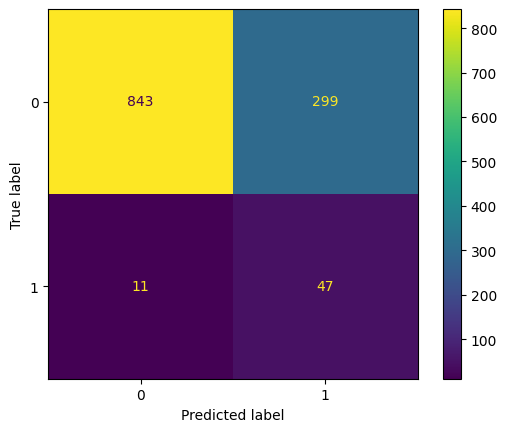

In [100]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

Q7

In [102]:
from sklearn.svm import SVC
model = SVC(
    kernel='rbf',
	decision_function_shape='ovr',
	random_state=1729,
	C=1
)

model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[1142,    0],
       [  58,    0]], dtype=int64)

Q8

In [111]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion = 'entropy',
	splitter = 'random',
	min_samples_split = 4,
	min_impurity_decrease = 0.0001,
	random_state = 1729
)

model.fit(X_train,y_train)

# Depth of the tree
print(model.get_depth())

# Number of nodes in the three
print(model.tree_.node_count)

# Finding impurity of the left child of root
left_child_index = model.tree_.children_left[0]
print(model.tree_.impurity[left_child_index])

20
515
0.024564134553940277


Q11

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
model_tree = BaggingClassifier(
    n_estimators = 20,
    random_state=1729,
    estimator=DecisionTreeClassifier(random_state=1729)
)
model_knn = BaggingClassifier(
    n_estimators = 20,
    random_state=1729,
    estimator=KNeighborsClassifier()
)
model_logreg = BaggingClassifier(
    n_estimators = 20,
    random_state=1729,
    estimator=LogisticRegression(random_state=1729)
)

models = [model_tree, model_knn, model_logreg]
score = []
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    trs = accuracy_score(y_train, y_pred_train)
    tes = accuracy_score(y_test, y_pred_test)
    score.append(abs(trs - tes))
score

[0.049761904761904674, 0.0013095238095238715, 0.00023809523809525945]

Q12

In [122]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
model = VotingClassifier(
    estimators=[('a',DecisionTreeClassifier(random_state=1729)), ('b', KNeighborsClassifier()), ('c',LogisticRegression(random_state=1729))]
)

from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
trs = accuracy_score(y_train, y_pred_train)
tes = accuracy_score(y_test, y_pred_test)
abs(trs - tes)

0.004285714285714337